In [1]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from graph_colouring_problem import obtain_colours
from adjacent_matrix import create_adjacent_matrix, sorted_adjacency_matrix_with_clusters

In [2]:
def number_to_discrete_color(index, total_colors):
    cmap = plt.get_cmap('tab20b', total_colors)
    rgba = cmap(index / total_colors)
    return mcolors.to_hex(rgba)

In [3]:
# Load the shapefile (this path assumes you have the shapefile locally)
gdf = gpd.read_file('./COMARQUES/divisions-administratives-v2r1-comarques-250000-20240701.shp')
gdf['NOM'] = gdf['NOMCOMAR']
"""gdf = gpd.read_file('./MUNICIPIS/divisions-administratives-v2r1-municipis-250000-20240701.shp')
gdf['NOM'] = gdf['NOMMUNI']"""

"gdf = gpd.read_file('./MUNICIPIS/divisions-administratives-v2r1-municipis-250000-20240701.shp')\ngdf['NOM'] = gdf['NOMMUNI']"

In [5]:
# ALBA
matrix = create_adjacent_matrix(gdf)
color_numbers, report_data, time = obtain_colours(matrix, population_size = 300, prob_mutation = 0.2, max_generations = 500,
                        crossover_type = 'one-point', crossover_prob = 0.5, elitism_size = 5)

Number of colors: 8, Generation: 16
Number of colors: 7, Generation: 22
Number of colors: 6, Generation: 23
Number of colors: 5, Generation: 27
Number of colors: 4, Generation: 45


In [4]:
data_dict = {"Alt Camp": 32, "Alt Empordà": 12, "Alt Penedès": 27, "Alt Urgell": 6, "Alta Ribagorça": 3, "Anoia": 28, "Bages": 22, "Baix Camp": 35, "Baix Ebre": 42, "Baix Empordà": 13, "Baix Llobregat": 25, "Baix Penedès": 33, "Barcelonès": 24, "Berguedà": 8, "Cerdanya": 9, "Conca de Barberà": 31, "Garraf": 26, "Garrigues": 37, "Garrotxa": 11, "Gironès": 15, "Maresme": 17, "Montsià": 43, "Noguera": 5, "Osona": 19, "Pallars Jussà": 4, "Pallars Sobirà": 2, "Pla d'Urgell": 38, "Pla de l'Estany": 14, "Priorat": 36, "Ribera d'Ebre": 40, "Ripollès": 10, "Segarra": 29, "Segrià": 39, "Selva": 16, "Solsonès": 7, "Tarragonès": 35, "Terra Alta": 41, "Urgell": 30, "Val d'Aran": 1, "Vallès Occidental": 23, "Vallès Oriental": 18, "Moianès": 21, "Lluçanès": 20}

In [5]:
gdf2 = gdf[gdf['NOMCOMAR'].isin(['Ripollès', 'Cerdanya', 'Garrotxa', 'Alt Empordà', "Pla de l'Estany", 'Gironès', 'Baix Empordà', 'Selva'])]
gdf2

,CODICOMAR,NOMCOMAR,CAPCOMAR,AREAC5000,geometry,NOM
1,02,Alt Empordà,Figueres,1356.6336,"MULTIPOLYGON (((513762.790 4662390.070, 513760...",Alt Empordà
9,10,Baix Empordà,la Bisbal d'Empordà,701.1631,"MULTIPOLYGON (((498500.270 4622836.920, 498479...",Baix Empordà
14,15,Cerdanya,Puigcerdà,546.3978,"MULTIPOLYGON (((417240.539 4704752.127, 417684...",Cerdanya
18,19,Garrotxa,Olot,733.3229,"POLYGON ((462306.492 4686925.593, 462315.342 4...",Garrotxa
19,20,Gironès,Girona,575.9353,"POLYGON ((494081.526 4662565.750, 494214.685 4...",Gironès
27,28,Pla de l'Estany,Banyoles,263.3198,"POLYGON ((482775.700 4671868.200, 483369.000 4...",Pla de l'Estany
30,31,Ripollès,Ripoll,956.8939,"MULTIPOLYGON (((419785.996 4664417.149, 419923...",Ripollès
33,34,Selva,Santa Coloma de Farners,994.0428,"MULTIPOLYGON (((482696.254 4613155.804, 482689...",Selva


In [6]:
m2 = create_adjacent_matrix(gdf2)

KeyError: 0

In [ ]:
adjacency_matrix = create_adjacent_matrix(gdf)

In [9]:
data_dict = {
    "Alt Camp": 32, "Alt Empordà": 12, "Alt Penedès": 27, "Alt Urgell": 6,
    "Alta Ribagorça": 3, "Anoia": 28, "Bages": 22, "Baix Camp": 35,
    "Baix Ebre": 42, "Baix Empordà": 13, "Baix Llobregat": 25, "Baix Penedès": 33,
    "Barcelonès": 24, "Berguedà": 8, "Cerdanya": 9, "Conca de Barberà": 31,
    "Garraf": 26, "Garrigues": 37, "Garrotxa": 11, "Gironès": 15, "Maresme": 17,
    "Montsià": 43, "Noguera": 5, "Osona": 19, "Pallars Jussà": 4,
    "Pallars Sobirà": 2, "Pla d'Urgell": 38, "Pla de l'Estany": 14,
    "Priorat": 36, "Ribera d'Ebre": 40, "Ripollès": 10, "Segarra": 29,
    "Segrià": 39, "Selva": 16, "Solsonès": 7, "Tarragonès": 35,
    "Terra Alta": 41, "Urgell": 30, "Val d'Aran": 1, "Vallès Occidental": 23,
    "Vallès Oriental": 18, "Moianès": 21, "Lluçanès": 20
}

# Assuming gdf is your GeoDataFrame
# Create a list of names ordered by their corresponding values in data_dict
ordered_names = sorted(data_dict, key=data_dict.get)

# Reorder gdf based on this ordered list
gdf_sorted = gdf.set_index('NOMCOMAR').reindex(ordered_names).reset_index()

# Create an index map for the ordered names
index_map = {name: idx for idx, name in enumerate(ordered_names)}

# Reorder the adjacency matrix (assuming it's a NumPy array)
# Create a new reordered adjacency matrix
adjacency_matrix_sorted = np.zeros_like(adjacency_matrix)

# Fill in the reordered adjacency matrix
for new_idx, name in enumerate(ordered_names):
    original_idx = index_map[name]
    adjacency_matrix_sorted[new_idx, :] = adjacency_matrix[original_idx, :]
    adjacency_matrix_sorted[:, new_idx] = adjacency_matrix[:, original_idx]

NameError: name 'adjacency_matrix' is not defined

In [3]:
#temps que tarda, número de generacions total, número de fitness function calls, número de colors trobats
population_size = [30, 100, 300]
prob_mutation = [0, 0.2, 0.6]
max_generations = [0, 0.2, 0.6]

In [10]:
results = {}
for matrix, name in [(adjacency_matrix_sorted, 'OAM'), (adjacency_matrix, 'AM'), ]:
    results[name] = {'time': [], 'colors': []}
    for i in range(5):
        color_numbers, report_data, time = obtain_colours(matrix, population_size = 300, prob_mutation = 0.2, max_generations = 500,
                        crossover_type = 'one-point', crossover_prob = 0.5)
        results[name]['colors'].append(len(np.unique(color_numbers)))
        results[name]['time'].append(time)
        print(color_numbers)

NameError: name 'adjacency_matrix_sorted' is not defined

In [7]:
color_numbers, report_data, time = obtain_colours(matrix, population_size = 300, prob_mutation = 0.2, max_generations = 500,
                        crossover_type = 'one-point', crossover_prob = 0.5)

NameError: name 'matrix' is not defined

In [16]:
# Get the unique numbers from the list and assign each a color
unique_numbers = list(set(color_numbers))
total_unique_colors = len(unique_numbers)

# Create a dictionary mapping each unique number to a color
number_color_mapping = {num: number_to_discrete_color(i, total_unique_colors) for i, num in enumerate(unique_numbers)}

# Now map each comarca name to its corresponding color based on its number
comarca_colors = {name: number_color_mapping[num] for name, num in zip(gdf['NOM'], color_numbers)}

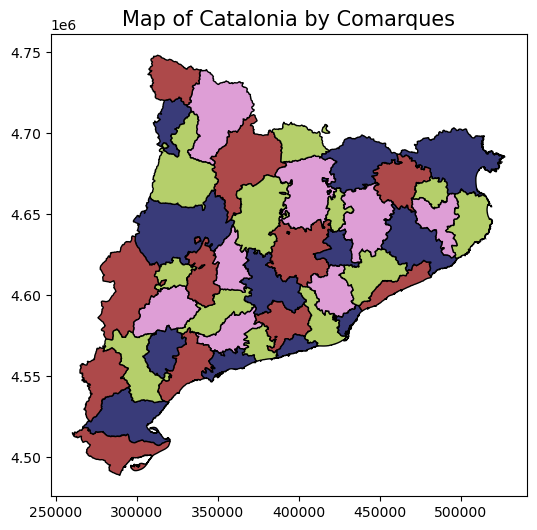

In [17]:
# Create a new column for colors based on the comarca names
gdf['color'] = gdf['NOM'].map(comarca_colors).fillna('#FFFFFF')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
gdf.plot(ax=ax, color=gdf['color'], edgecolor='black')
ax.set_title("Map of Catalonia by Comarques", fontsize=15)
plt.show()

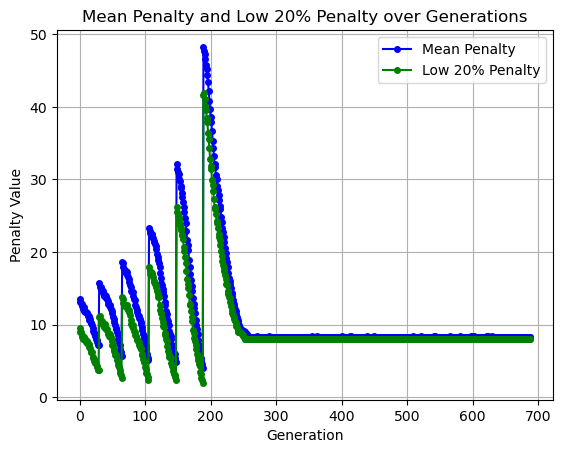

In [18]:
plt.plot(report_data['Generation'], report_data['Mean Penalty'], label='Mean Penalty', marker='o', markersize=4, color='blue')

# Plot for Low 5% Penalty
plt.plot(report_data['Generation'], report_data['Low 20% penalty'], label='Low 20% Penalty', marker='o', markersize=4, color='green')

# Add labels and title
plt.xlabel('Generation')
plt.ylabel('Penalty Value')
plt.title('Mean Penalty and Low 20% Penalty over Generations')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()